In [1]:
import re
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

In [3]:
link = 'https://www.google.co.id/search?q=seva'
# &start=100

In [4]:
ua = UserAgent()
r  = requests.get(link, headers={'User-Agent':ua.random})
data = r.text
soup = BeautifulSoup(data,'lxml')

In [33]:
soup.findAll('cite')

[<cite class="UdQCqe">flashsale.seva.id/FlashSaleTerios/Cuma50juta</cite>,
 <cite class="iUh30">https://www.seva.id/</cite>,
 <cite class="wvpjNc">Tribunnews.com</cite>,
 <cite class="wvpjNc">Tribun Wow - Tribunnews.com</cite>,
 <cite class="wvpjNc">Tribun Jogja</cite>,
 <cite class="iUh30">https://oto.detik.com/.../siap-siap-flash-sale-mobil-rp-50-juta-dari-sevaid-hadir-kembal...</cite>,
 <cite class="iUh30 bc">www.tribunnews.com › Otomotif › News</cite>,
 <cite class="iUh30 bc">wow.tribunnews.com › Otomotif › Produk Mobil</cite>,
 <cite class="iUh30">https://www.instagram.com/sevaid_official/</cite>]

In [10]:
soup.findAll('h3',{'style':'display:inline-block'})

[<h3 style="display:inline-block">Seva.id | Flash Sale Promo New Terios | New Terios #Beneran50Juta‎</h3>]

In [11]:
soup.findAll('h3',{'class':'LC20lb'})

[<h3 class="LC20lb">Seva.id: Layanan Online Terpercaya Otomotif Hingga Properti</h3>,
 <h3 class="LC20lb">Siap-siap! Flash Sale Mobil Rp 50 Juta dari Seva.id Hadir Kembali</h3>,
 <h3 class="LC20lb">Siap-Siap! Flash Sale Mobil Rp50 Juta dari Seva.id Akan Digelar 21 ...</h3>,
 <h3 class="LC20lb">Flash Sale Seva.id, New Yaris dan Fortuner Harganya Cuma 50 Juta ...</h3>,
 <h3 class="LC20lb">Seva.id (@sevaid_official) • Instagram photos and videos</h3>]

In [16]:
soup.findAll('div',{'class':'fn6bCb'})[0].text

'Siap-Siap! Flash Sale Mobil Rp50 Juta dari Seva.id Akan Digelar 21 November \n2018!'

In [17]:
len(soup.findAll('div',{'class':'fn6bCb'}))

3

In [48]:
soup.findAll('g-card-section',{'class':'HIp9oc jDsVJf'})[0].find('a').get('href')


b = soup.findAll('g-card-section',{'class':'HIp9oc jDsVJf'})
for i in range(len(b)):
    link.append(b[i].find('a').get('href'))

'http://www.tribunnews.com/otomotif/2018/11/12/siap-siap-flash-sale-mobil-rp50-juta-dari-sevaid-akan-digelar-21-november-2018'

In [1]:
import re
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

i = 0
stop = 0
link1 = 'https://www.google.co.id/search?q='
keyword = 'mobil+50+juta'
link2 = '&start='
page = '0'
link = []
title = []
status = []
ua = UserAgent()
r  = requests.get(link1+keyword+link2+page, headers={'User-Agent':ua.random})
data = r.text
soup = BeautifulSoup(data,'lxml')

a = soup.findAll('cite',{'class':'UdQCqe'})
for i in range(len(a)):
    link.append(a[i].text)
a = soup.findAll('h3',{'style':'display:inline-block'})
for i in range(len(a)):
    title.append(a[i].text)
    status.append('iklan')
    
b = soup.findAll('g-card-section',{'class':'HIp9oc jDsVJf'})
for i in range(len(b)):
    link.append(b[i].find('a').get('href'))
b = soup.findAll('div',{'class':'fn6bCb'})
for i in range(len(b)):
    title.append(b[i].text)
    status.append('berita utama')
    
c = soup.findAll('div',{'class':'r'})
for i in range(len(c)):
    link.append(c[i].find('a').get('href'))
c = soup.findAll('h3',{'class':'LC20lb'})
for i in range(len(c)):
    title.append(c[i].text)
    status.append('hasil google')
    
df = pd.DataFrame(data=list(zip(link,title, status)), columns=['link','title','status'])
df

,link,title,status
0,www.blibli.com/Mobil,"Mobil Baru Harga 50 Jutaan | Cicilan 0%, Uang ...",iklan
1,www.otomart.id/,Showroom Mobil Bekas | Harga terbaik mulai dr ...,iklan
2,http://www.tribunnews.com/otomotif/2018/11/12/...,Siap-Siap! Flash Sale Mobil Rp50 Juta dari Sev...,berita utama
3,http://jogja.tribunnews.com/2018/11/12/faris-d...,"Faris Dapat Toyota Fortuner hanya Rp50 Juta, F...",berita utama
4,https://otomurah.com/mobil-dijual/mlt50000000,"Jual beli mobil di bawah 50 juta, kondisi bagu...",hasil google
5,https://www.olx.co.id/mobil/q-50juta/,50Juta - Mobil Murah Dengan Harga Terbaik - OL...,hasil google
6,https://oto.detik.com/mobil/d-4298655/siap-sia...,Siap-siap! Flash Sale Mobil Rp 50 Juta dari Se...,hasil google
7,https://www.otomonesia.com/98/harga-mobil-50-j...,Harga Mobil 50 Jutaan Baru dan Bekas Semua Mer...,hasil google
8,https://www.otomotifo.com/harga-mobil-bekas-di...,30 Harga Mobil Bekas Dibawah 50 Juta Terbaik T...,hasil google
9,http://www.otokers.com/harga-mobil-dibawah-50-...,Daftar Harga Mobil Bekas Murah Dibawah 50 Juta...,hasil google


In [23]:
soup.find('span',{'style':'display:block;margin-left:53px'})

<span style="display:block;margin-left:53px">Berikutnya</span>

# Pake yang ini aja codingannya

In [27]:
import re
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

In [5]:
lKey = ['sevaid','flash sale','mobil 50 juta','flash sale seva id','seva id','#beneran50juta','#sevaid','mobil 50jt','mobil 50 jt','promo mobil 50jt', 'beli mobil 50jt','toyota','daihatsu','isuzu','bmw','peugeot'] 
# lKey = ['mobil 50 juta']

In [6]:
for i in range(len(lKey)):
    lKey[i] = re.sub(r' ','+',lKey[i])

In [8]:
link1 = 'https://www.google.co.id/search?q='
link2 = '&cr=countryID'
link3 = '&tbs=ctr:countryID,qdr:m'
link4 = '&start='
link = []
title = []
status = []
key = []
ua = UserAgent()

for k in lKey:
    j = 0
    stop = 0
    keyword = k
    print(keyword)
    while stop != 1:
        print(j/10+1)
        page = str(j)
        r  = requests.get(link1+keyword+link2+link3+link4+page, headers={'User-Agent':ua.random})
        data = r.text
        soup = BeautifulSoup(data,'lxml')
        if soup.find('span',{'style':'display:block;margin-left:53px'}) is not None:
            a = soup.findAll('cite',{'class':'UdQCqe'})
            for i in range(len(a)):
                link.append(a[i].text)
            a = soup.findAll('h3',{'style':'display:inline-block'})
            for i in range(len(a)):
                title.append(a[i].text)
                status.append('iklan')
                key.append(k)

            b = soup.findAll('g-card-section',{'class':'HIp9oc jDsVJf'})
            for i in range(len(b)):
                link.append(b[i].find('a').get('href'))
            b = soup.findAll('div',{'class':'fn6bCb'})
            for i in range(len(b)):
                title.append(b[i].text)
                status.append('berita utama')
                key.append(k)

            c = soup.findAll('div',{'class':'r'})
            for i in range(len(c)):
                link.append(c[i].find('a').get('href'))
            c = soup.findAll('h3',{'class':'LC20lb'})
            for i in range(len(c)):
                title.append(c[i].text)
                status.append('hasil google')
                key.append(k)
            j += 10
        else:
            a = soup.findAll('cite',{'class':'UdQCqe'})
            for i in range(len(a)):
                link.append(a[i].text)
            a = soup.findAll('h3',{'style':'display:inline-block'})
            for i in range(len(a)):
                title.append(a[i].text)
                status.append('iklan')
                key.append(k)

            b = soup.findAll('g-card-section',{'class':'HIp9oc jDsVJf'})
            for i in range(len(b)):
                link.append(b[i].find('a').get('href'))
            b = soup.findAll('div',{'class':'fn6bCb'})
            for i in range(len(b)):
                title.append(b[i].text)
                status.append('berita utama')
                key.append(k)

            c = soup.findAll('div',{'class':'r'})
            for i in range(len(c)):
                link.append(c[i].find('a').get('href'))
            c = soup.findAll('h3',{'class':'LC20lb'})
            for i in range(len(c)):
                title.append(c[i].text)
                status.append('hasil google')
                key.append(k)
            stop = 1

sevaid
1.0
flash+sale
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
mobil+50+juta
1.0
2.0
3.0
4.0
5.0
flash+sale+seva+id
1.0
2.0
3.0
4.0
seva+id
1.0
2.0
3.0
4.0
5.0
6.0
#beneran50juta
1.0
#sevaid
1.0
mobil+50jt
1.0
2.0
3.0
mobil+50+jt
1.0
2.0
3.0
4.0
promo+mobil+50jt
1.0
2.0
3.0
beli+mobil+50jt
1.0
2.0
3.0
toyota
1.0
2.0
3.0
4.0
5.0
6.0
daihatsu
1.0
2.0
3.0
4.0
isuzu
1.0
2.0
3.0
4.0
5.0
bmw
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
peugeot
1.0
2.0
3.0
4.0
5.0


In [9]:
df = pd.DataFrame(data=list(zip(link,title, status,key)), columns=['link','title','status','keyword'])
df.head()

,link,title,status,keyword
0,flashsale.seva.id/FlashSaleTerios/Cuma50juta,Seva.id | Flash Sale Promo New Terios | New Te...,iklan,sevaid
1,https://www.detik.com/sevaid/,Kuis Berhadiah Mau Apa Saja 2018 | detikcom - ...,hasil google,sevaid
2,https://news.detik.com/berita/4264505/ikuti-qu...,"Ikuti 'Quiz Kita Kasih', Dapatkan Helm LS2 Rap...",hasil google,sevaid
3,http://wow.tribunnews.com/2018/11/12/flash-sal...,Flash Sale Daihatsu Terios Harga Rp 50 Juta da...,hasil google,sevaid
4,http://www.tribunnews.com/otomotif/2018/11/12/...,Siap-Siap! Flash Sale Mobil Rp50 Juta dari Sev...,hasil google,sevaid


In [16]:
# df.to_csv(r'C:\Users\hansha058511\Desktop\keyword.csv',index=None)

# Word cloud

In [137]:
import re
import nltk
import wordcloud
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

df = pd.read_csv(r'C:\Users\hansha058511\Desktop\keyword.csv')
df = df[df['status'] != 'iklan']

In [138]:
df['title'] = df['title'].apply(lambda x: re.sub(r'\W+',' ',x))
df['title'] = df['title'].apply(lambda x: str(x).lower())

In [139]:
df.head()

,link,title,status,keyword
1,https://www.detik.com/sevaid/,kuis berhadiah mau apa saja 2018 detikcom seva id,hasil google,sevaid
2,https://news.detik.com/berita/4264505/ikuti-qu...,ikuti quiz kita kasih dapatkan helm ls2 rapid ...,hasil google,sevaid
3,http://wow.tribunnews.com/2018/11/12/flash-sal...,flash sale daihatsu terios harga rp 50 juta da...,hasil google,sevaid
4,http://www.tribunnews.com/otomotif/2018/11/12/...,siap siap flash sale mobil rp50 juta dari seva...,hasil google,sevaid
5,https://www.seva.id/event/aman/,aman seva id,hasil google,sevaid


In [140]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['title'] = df['title'].apply(lambda x: stemmer.stem(x))

In [141]:
df.head()

,link,title,status,keyword
1,https://www.detik.com/sevaid/,kuis hadiah mau apa saja 2018 detikcom seva id,hasil google,sevaid
2,https://news.detik.com/berita/4264505/ikuti-qu...,ikut quiz kita kasih dapat helm ls2 rapid soli...,hasil google,sevaid
3,http://wow.tribunnews.com/2018/11/12/flash-sal...,flash sale daihatsu terios harga rp 50 juta da...,hasil google,sevaid
4,http://www.tribunnews.com/otomotif/2018/11/12/...,siap siap flash sale mobil rp50 juta dari seva...,hasil google,sevaid
5,https://www.seva.id/event/aman/,aman seva id,hasil google,sevaid


In [142]:
df['unigram'] = df['title'].apply(lambda x: nltk.word_tokenize(x))

In [143]:
df['bigram'] = df['unigram'].apply(lambda x: list(nltk.bigrams(x)))

In [177]:
text_file = open(r"C:\Users\hansha058511\Desktop\listStopwords.txt", "r")
stopwordsID = text_file.read().split('\n')
stopwordsENG = set(stopwords.words('english'))

In [178]:
df['unigram'] = df['unigram'].apply(lambda x: [str(w) for w in x if not w in stopwordsID])
df['unigram'] = df['unigram'].apply(lambda x: [str(w) for w in x if not w in stopwordsENG])

In [179]:
df['bigram'].head()

1                         [(kuis, hadiah), (seva, id)]
2          [(helm, ls2), (ls2, rapid), (rapid, solid)]
3              [(flash, sale), (50, juta), (seva, id)]
4    [(flash, sale), (sale, mobil), (mobil, rp50), ...
5                           [(aman, seva), (seva, id)]
Name: bigram, dtype: object

In [180]:
df['bigram'] = df['bigram'].apply(lambda x: [tup for tup in x if not False in [False for wrd in tup if wrd.lower() in stopwordsID]])
df['bigram'] = df['bigram'].apply(lambda x: [tup for tup in x if not False in [False for wrd in tup if wrd.lower() in stopwordsENG]])

In [181]:
df['keyword'].unique()

array(['sevaid', 'flash+sale', 'mobil+50+juta', 'flash+sale+seva+id',
       'seva+id', 'mobil+50jt', 'mobil+50+jt', 'promo+mobil+50jt',
       'beli+mobil+50jt', 'toyota', 'daihatsu', 'isuzu', 'bmw', 'peugeot'],
      dtype=object)

In [182]:
a = df['unigram'][(df['keyword'] == 'toyota')|(df['keyword'] == 'daihatsu')|(df['keyword'] == 'isuzu')|
                   (df['keyword'] == 'bmw')|(df['keyword'] == 'peugeot')].sum()

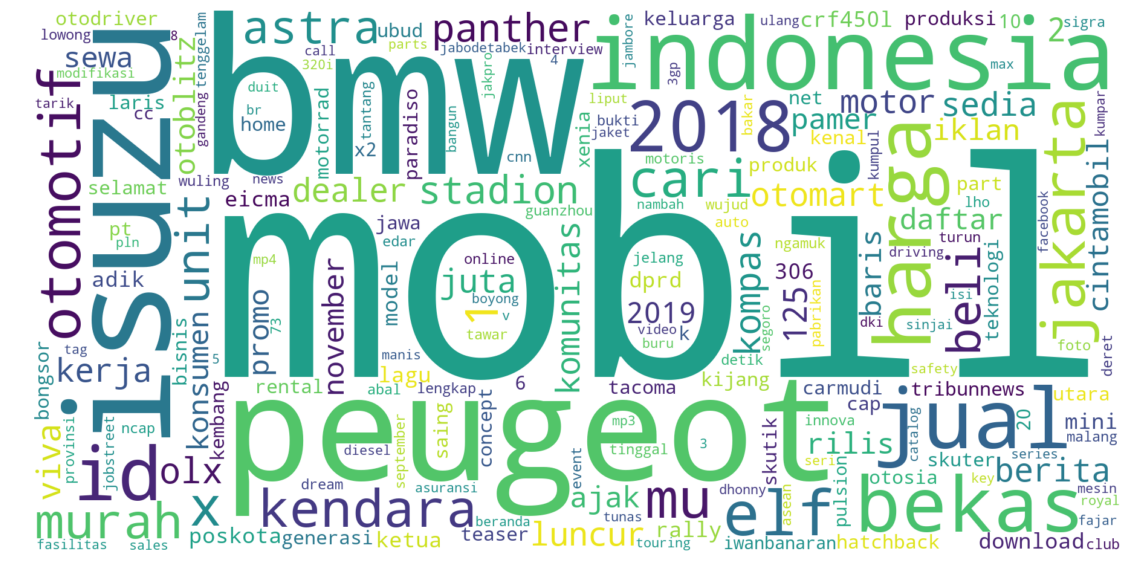

In [183]:
cloud = wordcloud.WordCloud(background_color='white',width=1800, height=900)
plt.figure(figsize=(20,10))
cloud.generate_from_frequencies(Counter(a))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig("foo.png")
plt.show()

In [184]:
b = df['unigram'][(df['keyword'] == 'sevaid')|(df['keyword'] == 'flash+sale')|(df['keyword'] == 'mobil+50+juta')|
                   (df['keyword'] == 'flash+sale+seva+id')|(df['keyword'] == 'seva+id')|(df['keyword'] == 'mobil+50jt')|
                   (df['keyword'] == 'mobil+50+jt')|(df['keyword'] == 'promo+mobil+50jt')|(df['keyword'] == 'beli+mobil+50jt')].sum()

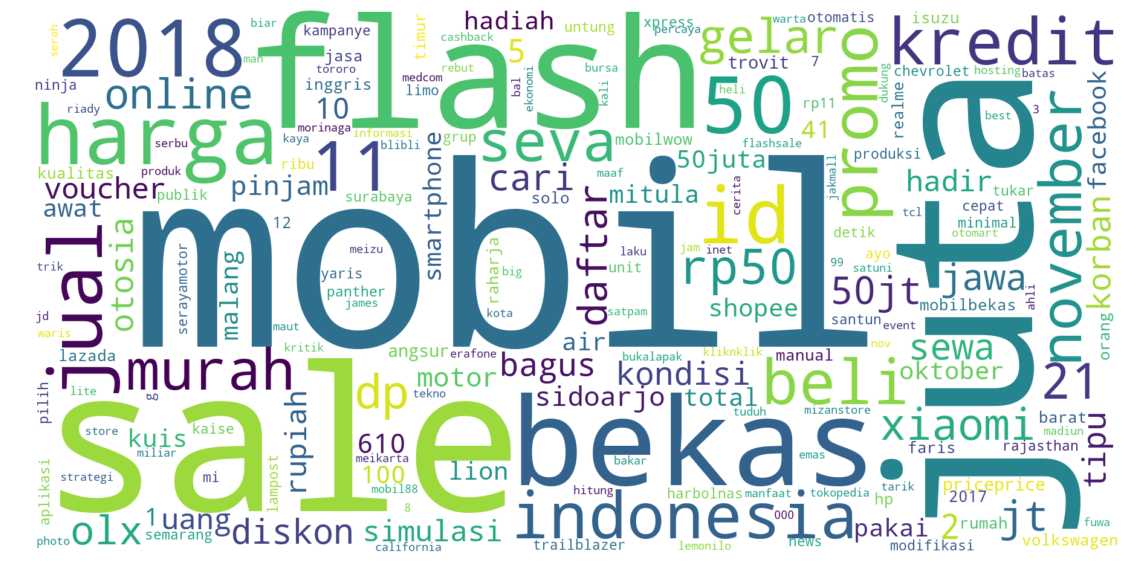

In [185]:
import wordcloud
import matplotlib.pyplot as plt
cloud = wordcloud.WordCloud(background_color='white',width=1800, height=900)
plt.figure(figsize=(20,10))
cloud.generate_from_frequencies(Counter(b))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig("foo.png")
plt.show()

In [186]:
c = df['bigram'][(df['keyword'] == 'toyota')|(df['keyword'] == 'daihatsu')|(df['keyword'] == 'isuzu')|
                 (df['keyword'] == 'bmw')|(df['keyword'] == 'peugeot')].sum()

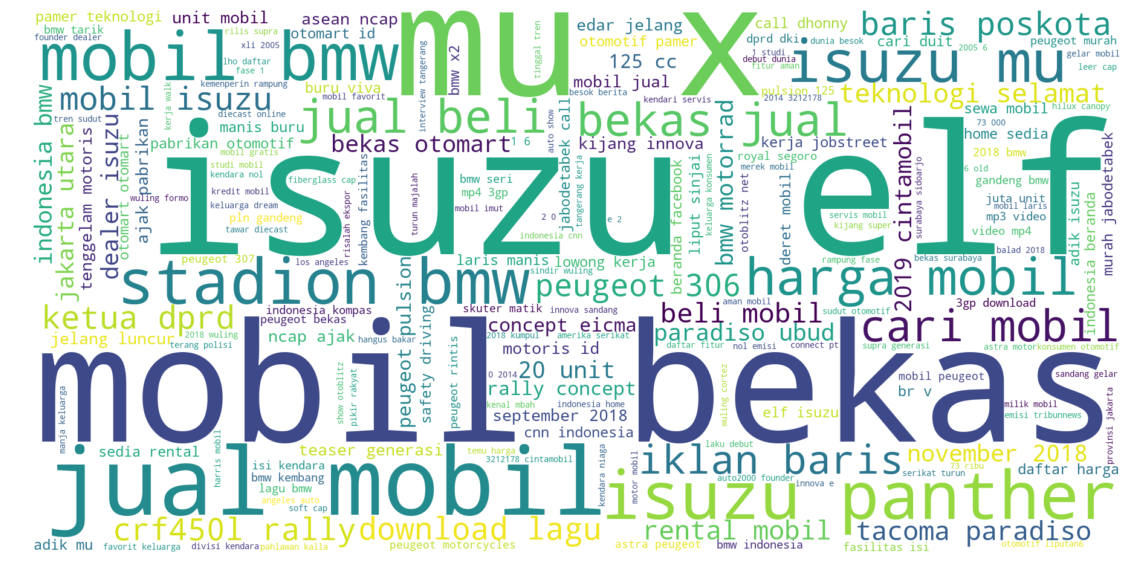

In [187]:
cloud = wordcloud.WordCloud(background_color='white',width=1800, height=900)
plt.figure(figsize=(20,10))
cloud.generate_from_frequencies(Counter(' '.join(w) for w in c))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig("foo.png")
plt.show()

In [188]:
d = df['bigram'][(df['keyword'] == 'sevaid')|(df['keyword'] == 'flash+sale')|(df['keyword'] == 'mobil+50+juta')|
                   (df['keyword'] == 'flash+sale+seva+id')|(df['keyword'] == 'seva+id')|(df['keyword'] == 'mobil+50jt')|
                   (df['keyword'] == 'mobil+50+jt')|(df['keyword'] == 'promo+mobil+50jt')|(df['keyword'] == 'beli+mobil+50jt')].sum()

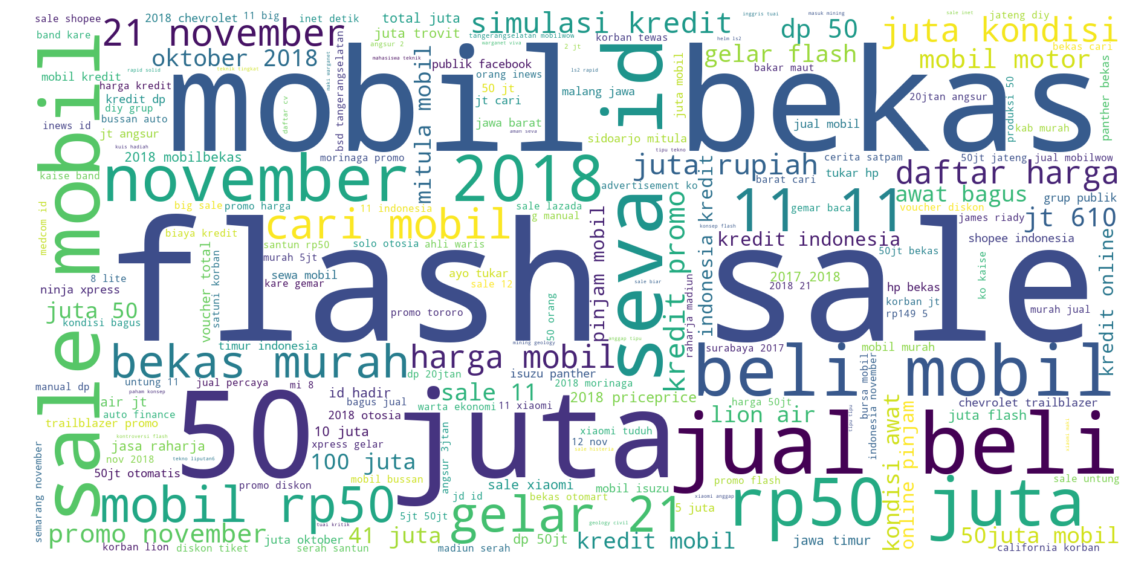

In [189]:
cloud = wordcloud.WordCloud(background_color='white',width=1800, height=900)
plt.figure(figsize=(20,10))
cloud.generate_from_frequencies(Counter(' '.join(w) for w in d))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig("foo.png")
plt.show()